# Modul

## Fungsi-fungsi *plotting*

Jangan mengubah kode pada *cell* di bawah ini.

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(func, X, target, padding=1):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()

    color = 'ro', 'bo'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], color[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, func(line_x))
    plt.show()

## Praktikum

### a) Fungsi *step* Bipolar

Tulis kode ke dalam *cell* di bawah ini:

In [2]:
def bipstep(y, th=0):
  return 1 if y >= th else -1

### b) Fungsi *training* Hebb

Tulis kode ke dalam *cell* di bawah ini:

In [3]:
def hebb_fit(train, target, verbose=False, draw=False,
draw_padding=1):
  w = np.zeros(len(train[0]) + 1)
  bias = np.ones((len(train), 1))
  train = np.hstack((bias, train))
  for r, row in enumerate(train):
    w = [w[i] + row[i] * target[r] for i in range(len(row))]
    if verbose:
      print('Bobot:', w)
    if draw:
      plot(line(w, 0), train, target, draw_padding)

  return w

### c) Fungsi *testing* Hebb

Tulis kode ke dalam *cell* di bawah ini:

In [4]:
def hebb_predict(X, w):
  Y = []
  for x in X:
    y_in = w[0] + np.dot(x, w[1:])
    y = bipstep(y_in)
    Y.append(y)
  return Y

### d) Fungsi Hitung Akurasi

In [5]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
  return sum(s) / len(a)

# Soal

Gunakan dataset "Healthcare-Diabetes.csv" yang telah dilampirkan

Soal yang diajukan:
Gunakan baris data ke-16 sampai ke-20

## Import data

In [17]:
from google.colab import files
uploaded = files.upload()

In [18]:
import pandas as pd

data = pd.read_csv('Healthcare-Diabetes.csv')
data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


## Preprocess

In [19]:
data = data.drop(columns=['Id'])
data['Outcome'] = data['Outcome'].replace(0, -1)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,-1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,-1
4,0,137,40,35,168,43.1,2.288,33,1


## Pengujian

Bobot: [1.0, 7.0, 100.0, 0.0, 0.0, 0.0, 30.0, 0.484, 32.0]


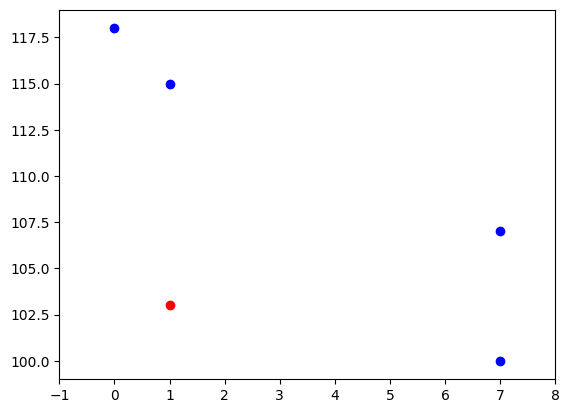

Bobot: [2.0, 7.0, 218.0, 84.0, 47.0, 230.0, 75.8, 1.0350000000000001, 63.0]


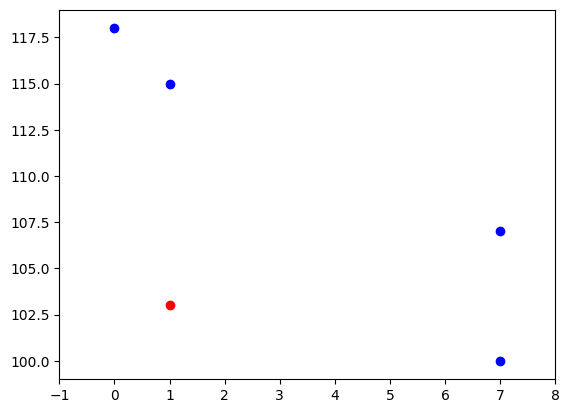

Bobot: [3.0, 14.0, 325.0, 158.0, 47.0, 230.0, 105.4, 1.2890000000000001, 94.0]


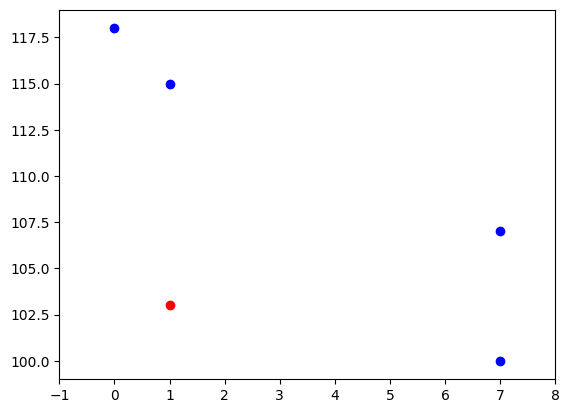

Bobot: [2.0, 13.0, 222.0, 128.0, 9.0, 147.0, 62.10000000000001, 1.106, 61.0]


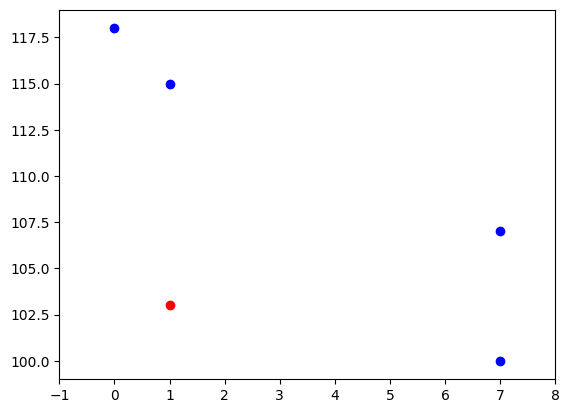

Bobot: [3.0, 14.0, 337.0, 198.0, 39.0, 243.0, 96.70000000000002, 1.6350000000000002, 93.0]


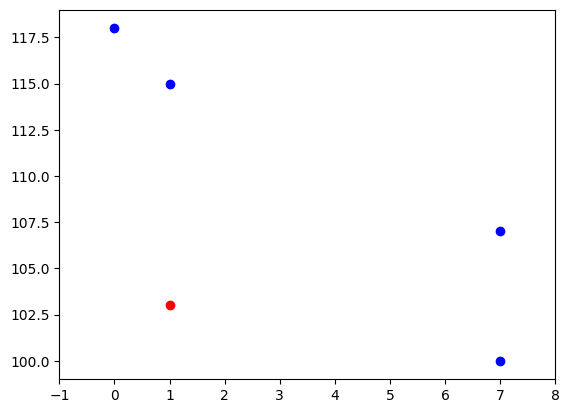

Output: [1, 1, 1, 1, 1]
Target: [ 1  1  1 -1  1]
Accuracy: 0.8


In [20]:
#isilah array train oleh praktikan berdasarkan nilai data pada baris data ke-16 sampai ke-20
train = np.array(data.iloc[15:20].drop(columns=['Outcome']))

#isilah array target oleh praktikan berdasarkan nilai data pada 5 baris data teratas saja
target = np.array(data.iloc[15:20]['Outcome'])
model = hebb_fit(train, target, verbose=True, draw=True)
output = hebb_predict(train, model)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)